Ecole Normale Supérieure d'Enseignement Technique - Mohammedia<br/>
Master Systèmes Distribués et Intelligence Artificielle<br/>
ML Project : Predictive analysis for crop yield prediction<br/>
**Oussama Lahrache** & **Ayoub Marghad**<br/>
Année universitaire : 2023 - 2024




In [1]:
figs_out_dir = "images/"

# Chargement et exploration des données

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib as jb

In [3]:
ds = pd.read_csv("crop_yield.csv").drop('Production', axis=1)

In [4]:
ds2 = pd.read_csv("crop_yield.csv")

In [5]:
ds.head(5)

,Crop,Crop_Year,Season,State,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,2051.4,165500.63,539.09,0.420909


In [6]:
ds.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

# Data cleaning

## Encodage des données

### Encodage du type du crop

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
crop_encoder = LabelEncoder()
ds.Crop = crop_encoder.fit_transform(ds.Crop)

In [9]:
crop_classes = crop_encoder.classes_

In [10]:
cc_enc = crop_encoder.transform(crop_classes)
classes_crop_dict = dict(zip(crop_classes, cc_enc))
classes_crop_dict

{'Arecanut': 0,
 'Arhar/Tur': 1,
 'Bajra': 2,
 'Banana': 3,
 'Barley': 4,
 'Black pepper': 5,
 'Cardamom': 6,
 'Cashewnut': 7,
 'Castor seed': 8,
 'Coconut ': 9,
 'Coriander': 10,
 'Cotton(lint)': 11,
 'Cowpea(Lobia)': 12,
 'Dry chillies': 13,
 'Garlic': 14,
 'Ginger': 15,
 'Gram': 16,
 'Groundnut': 17,
 'Guar seed': 18,
 'Horse-gram': 19,
 'Jowar': 20,
 'Jute': 21,
 'Khesari': 22,
 'Linseed': 23,
 'Maize': 24,
 'Masoor': 25,
 'Mesta': 26,
 'Moong(Green Gram)': 27,
 'Moth': 28,
 'Niger seed': 29,
 'Oilseeds total': 30,
 'Onion': 31,
 'Other  Rabi pulses': 32,
 'Other Cereals': 33,
 'Other Kharif pulses': 34,
 'Other Summer Pulses': 35,
 'Peas & beans (Pulses)': 36,
 'Potato': 37,
 'Ragi': 38,
 'Rapeseed &Mustard': 39,
 'Rice': 40,
 'Safflower': 41,
 'Sannhamp': 42,
 'Sesamum': 43,
 'Small millets': 44,
 'Soyabean': 45,
 'Sugarcane': 46,
 'Sunflower': 47,
 'Sweet potato': 48,
 'Tapioca': 49,
 'Tobacco': 50,
 'Turmeric': 51,
 'Urad': 52,
 'Wheat': 53,
 'other oilseeds': 54}

### Encodage du **state**

In [11]:
state_encoder = LabelEncoder()
ds.State = state_encoder.fit_transform(ds.State)

### Encodage du season

In [12]:
season_encoder = LabelEncoder()
ds.Season = season_encoder.fit_transform(ds.Season)

# Feature selection

## Correlation analysis

In [13]:
corr = ds.corr()

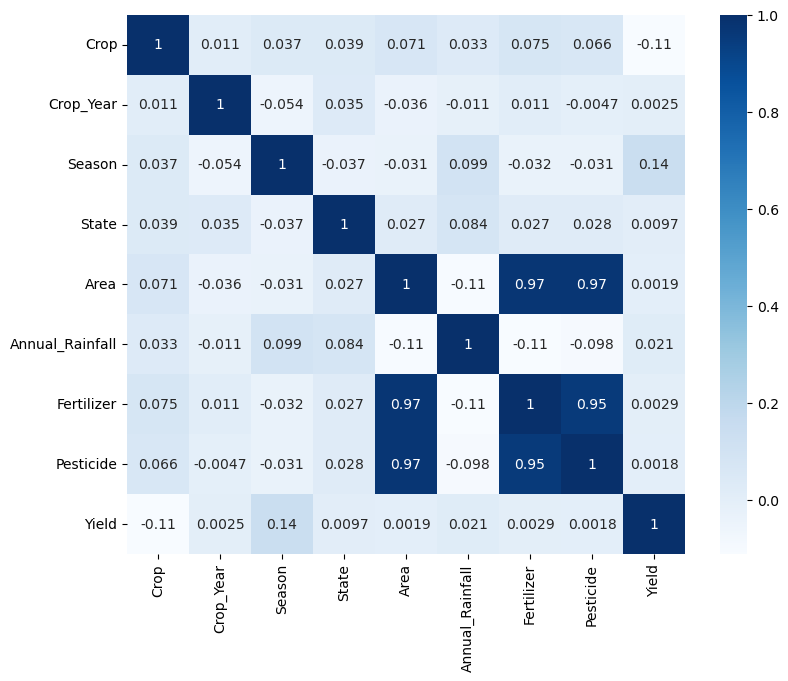

In [14]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.savefig(figs_out_dir +"correlation_heatmap.png")

In [15]:
# Drop low correlated feature with the target
ds.drop(['Crop_Year', 'State', 'Pesticide', 'Area'], axis=1, inplace=True)

<Axes: >

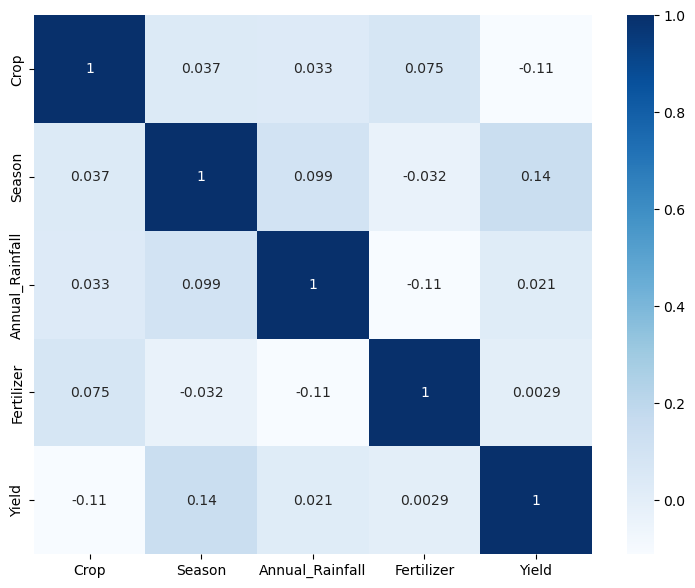

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(ds.corr(), annot=True, cmap='Blues')

In [17]:
features = ds.drop('Yield', axis=1)
target = ds.Yield

## Analyse de variance

In [18]:
variance = features.var()

In [19]:
variance.sort_values(ascending=False)

Fertilizer         9.014744e+15
Annual_Rainfall    6.673413e+05
Crop               2.421403e+02
Season             1.494539e+00
dtype: float64

<Axes: >

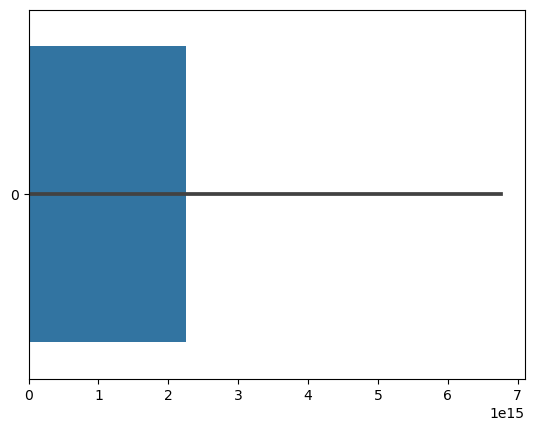

In [20]:
variance.sort_values(inplace=True, ascending=False)
sns.barplot(variance, orient = 'h')

## Dataset split (80% train, 20% test)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, random_state=42, test_size=0.2)

## Standar Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
scaler = StandardScaler()

In [97]:
X_train = scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

## Building models

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [29]:
random_forest_regressor = RandomForestRegressor()
decision_tree_regressor = DecisionTreeRegressor()
knn_regressor = KNeighborsRegressor(n_neighbors=1)
svr = SVR()
lin_reg = LinearRegression()

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
pipe_knnr = make_pipeline(KNeighborsRegressor())
grid_knnr = GridSearchCV(pipe_knnr, param_grid={
    'kneighborsregressor__n_neighbors': range(1, 30, 2)
}, cv=10, n_jobs=-1)
grid_knnr.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__n_neighbors': range(1, 30, 2)})

In [32]:
grid_knnr.best_params_

{'kneighborsregressor__n_neighbors': 1}

In [33]:
random_forest_regressor.fit(X_train, Y_train)
decision_tree_regressor.fit(X_train, Y_train)
knn_regressor.fit(X_train, Y_train)
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [34]:
print(random_forest_regressor.score(X_test, Y_test))
print(decision_tree_regressor.score(X_test, Y_test))
print(knn_regressor.score(X_test, Y_test))
print(lin_reg.score(X_test, Y_test))

0.9492944844871273
0.9252696374073519
0.7377469473260869
0.031457542493547486


In [35]:
rfr_fi = pd.Series(random_forest_regressor.feature_importances_, index=features.columns).sort_values(ascending=False)

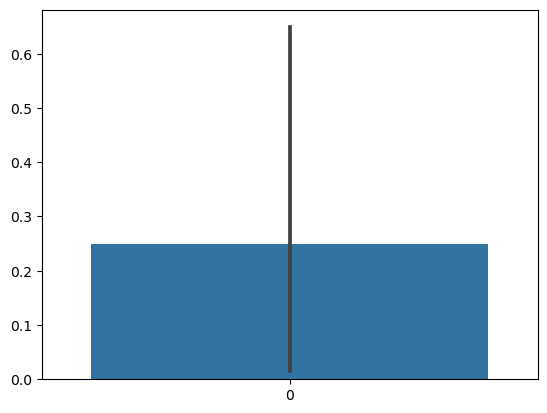

In [36]:
sns.barplot(rfr_fi)
plt.savefig(figs_out_dir + "random_forest_feature_importance.png")

In [37]:
dtr_fi = pd.Series(decision_tree_regressor.feature_importances_, index=features.columns).sort_values(ascending=False)

<Axes: >

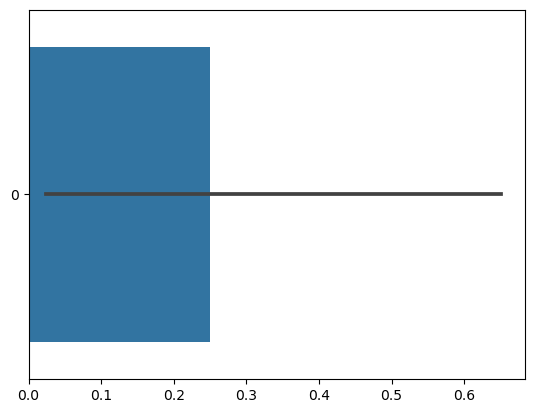

In [38]:
sns.barplot(dtr_fi, orient='h')

### RFE

In [39]:
from sklearn.feature_selection import RFE

In [40]:
rfe_dtr = RFE(estimator=decision_tree_regressor, step=1)
rfe_rfr = RFE(estimator=random_forest_regressor, step=1)

In [41]:
pipe = make_pipeline(rfe_dtr, rfe_rfr)
grid = GridSearchCV(pipe, param_grid={
    'rfe-1__n_features_to_select': range(1, X_train.shape[1] + 1),
    'rfe-2__n_features_to_select': range(1, X_train.shape[1] + 1)
}, cv=10, n_jobs=-1)

In [42]:
grid.fit(X_train, Y_train)

c:\Users\Oussama\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Oussama\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Oussama\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Oussama\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estim

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('rfe-1',
                                        RFE(estimator=DecisionTreeRegressor())),
                                       ('rfe-2',
                                        RFE(estimator=RandomForestRegressor()))]),
             n_jobs=-1,
             param_grid={'rfe-1__n_features_to_select': range(1, 5),
                         'rfe-2__n_features_to_select': range(1, 5)})

In [43]:
grid.best_params_

{'rfe-1__n_features_to_select': 4, 'rfe-2__n_features_to_select': 4}

In [44]:
grid.best_score_

0.9040532498417724

In [45]:
grid.cv_results_

{'mean_fit_time': array([  0.37835178,   0.49320226,   0.45301461,   0.37030299,
         13.53345788,  13.8558342 ,  14.41699247,  14.98052397,
         39.34303105, 366.69766409, 345.42578876,  19.2964587 ,
         50.55946293,  54.30589499,  44.37840114,  23.98855066]),
 'std_fit_time': array([2.88167486e-02, 1.39768036e-01, 1.08944580e-01, 2.65526751e-02,
        1.07426237e+00, 2.24508791e-01, 3.56338422e-01, 5.17693002e-01,
        9.54992883e-01, 3.98495282e+02, 4.01495542e+02, 1.25042416e+00,
        1.84962888e+00, 9.99373769e-01, 3.90706243e+00, 2.00619714e+00]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.03397365,
        0.09745402, 0.10129364, 0.11338532, 0.04495981, 0.11578913,
        0.09671445, 0.09870656, 0.0331352 , 0.10419397, 0.11770959,
        0.09377518]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.        , 0.00242461,
        0.00809491, 0.01372326, 0.01605879, 0.00881307, 0.02240191,
        0.03155892, 

In [46]:
dict(zip(grid.cv_results_.get("param_rfe-1__n_features_to_select").data, grid.cv_results_.get("mean_test_score")))

{1: nan, 2: 0.8566417246277782, 3: 0.9013173098304854, 4: 0.9040532498417724}

## Permutation importance

In [47]:
from sklearn.inspection import permutation_importance

In [48]:
rfr_perm_imp = permutation_importance(
    estimator=random_forest_regressor,
    X=X_test,
    y=Y_test,
    n_repeats=100    
)

In [49]:
pd.Series(rfr_perm_imp['importances_mean'], features.columns).sort_values(ascending=False)

Crop               1.961345
Fertilizer         0.208096
Annual_Rainfall    0.129559
Season            -0.001062
dtype: float64

In [50]:
rfr_perm_imp

{'importances_mean': array([ 1.96134525e+00, -1.06196750e-03,  1.29559274e-01,  2.08095687e-01]),
 'importances_std': array([0.11466773, 0.00048774, 0.0271237 , 0.06446903]),
 'importances': array([[ 2.02710394e+00,  1.78192511e+00,  1.80898797e+00,
          1.79623211e+00,  2.04770428e+00,  1.95911108e+00,
          1.99987532e+00,  1.91704039e+00,  1.79583643e+00,
          2.09058219e+00,  2.01237277e+00,  1.84312298e+00,
          2.02818531e+00,  2.01613728e+00,  2.15569561e+00,
          1.94442664e+00,  1.98633482e+00,  1.88658119e+00,
          2.00920656e+00,  2.01059102e+00,  2.03738936e+00,
          2.13855186e+00,  1.95229900e+00,  1.99216676e+00,
          1.79178042e+00,  1.91749391e+00,  2.03910875e+00,
          1.92358914e+00,  1.96803087e+00,  1.95299195e+00,
          1.80792444e+00,  1.92622034e+00,  2.05084215e+00,
          2.00788515e+00,  2.01621035e+00,  1.80047508e+00,
          2.08126871e+00,  1.72692528e+00,  1.91587389e+00,
          2.06331423e+00,  1.8

<Axes: >

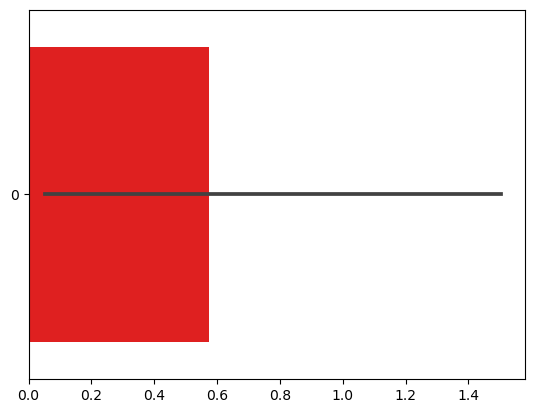

In [51]:
sns.barplot(pd.Series(rfr_perm_imp['importances_mean'], features.columns).sort_values(ascending=False), orient='h', color='red')

In [52]:
dt_perm_imp = permutation_importance(
    estimator=decision_tree_regressor,
    X=X_test,
    y=Y_test,
    n_repeats=100    
)

In [53]:
pd.Series(dt_perm_imp['importances_mean'], features.columns).sort_values(ascending=False)

Crop               2.139565
Fertilizer         0.272965
Annual_Rainfall    0.117457
Season             0.000095
dtype: float64

<Axes: >

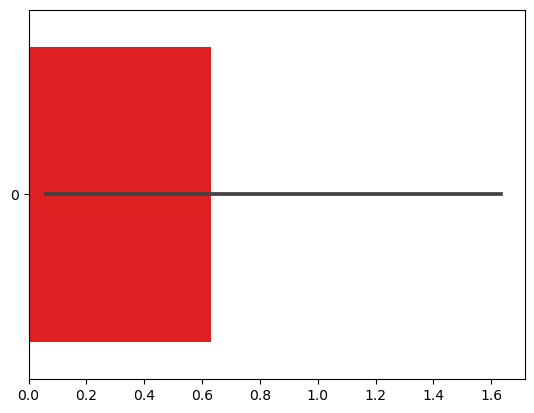

In [54]:
sns.barplot(pd.Series(dt_perm_imp['importances_mean'], features.columns).sort_values(ascending=False), orient='h', color='red')

In [55]:
knn_perm_imp = permutation_importance(
    estimator=knn_regressor,
    X=X_test,
    y=Y_test,
    n_repeats=100    
)

In [56]:
pd.Series(knn_perm_imp['importances_mean'], features.columns).sort_values(ascending=False)

Crop               1.112207
Season             0.825601
Annual_Rainfall    0.578674
Fertilizer         0.569039
dtype: float64

<Axes: >

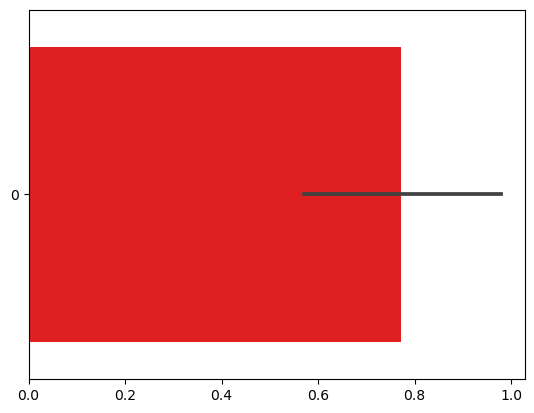

In [57]:
sns.barplot(pd.Series(knn_perm_imp['importances_mean'], features.columns).sort_values(ascending=False), orient='h', color='red')

# Module finale

In [134]:
final_features = features.drop('Season', axis=1)
scaler=StandardScaler()

In [135]:
f_random_forest_regressor = RandomForestRegressor()
f_decision_tree_regressor = DecisionTreeRegressor()


In [136]:
f_X_train, f_X_test, f_Y_train, f_Y_test = train_test_split(final_features, target, test_size=0.25, random_state=42)
f_X_train=scaler.fit_transform(f_X_train)
f_X_test=scaler.transform(f_X_test)

In [137]:
f_random_forest_regressor.fit(f_X_train, f_Y_train)
f_decision_tree_regressor.fit(f_X_train, f_Y_train)

DecisionTreeRegressor()

In [138]:
print(f_random_forest_regressor.score(f_X_train, f_Y_train))
print(f_decision_tree_regressor.score(f_X_train, f_Y_train))

0.9872168933629429
0.9999999980489838


In [139]:
print(f_random_forest_regressor.score(f_X_test, f_Y_test))
print(f_decision_tree_regressor.score(f_X_test, f_Y_test))

0.9327196639974163
0.915294946712137


In [140]:
jb.dump(f_random_forest_regressor,"random forest.pkl")
jb.dump(crop_encoder,"crops.pkl")

['crops.pkl']

In [141]:
x = np.array([0,0, 0]).reshape(1, -1)
x=scaler.transform(x)
print(f_random_forest_regressor.predict(x))
jb.dump(scaler,"scaler.pkl")

[1.125175]


c:\Users\Oussama\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


['scaler.pkl']